<a href="https://colab.research.google.com/github/modhudeb/CropDiseasePredictionPipeline/blob/main/CropDisPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
from skimage.feature import hog 
import os

In [ ]:
from skimage import exposure

# Pre-Process

In [ ]:
# os.getcwd()

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive/data")

In [ ]:
os.listdir()

['.ipynb_checkpoints', 'files', 'images']

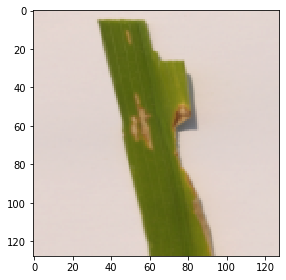

In [ ]:
image = io.imread("images/Bacterial_leaf_blight/DSC_0365.JPG")
image = transform.resize(image,(128,128))
image = transform.rotate(image,90)
io.imshow(image)

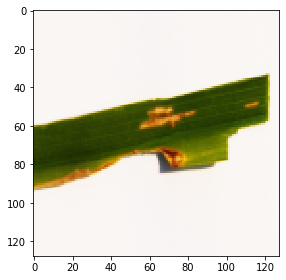

In [ ]:
jpg = transform.resize(io.imread("images/Bacterial_leaf_blight/DSC_0365.JPG"),(128,128))
image3 = exposure.adjust_sigmoid(jpg,cutoff=0.5)
io.imshow(image3)

(15876,)

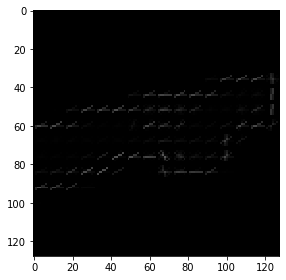

In [ ]:
image2,viz = hog(image3, orientations = 9, multichannel=True, visualize=True)
io.imshow(viz)
image2.shape

In [ ]:
class PreprosHog:
  def __init__(self, Path:str, Angle:int, exp:float=None):
    self.path = Path
    self.angle = Angle
    self.exp = exp
    
  def process(self):
    img = io.imread(self.path)
    img = transform.resize(img,(128,128))

    if self.exp is None:
      img = transform.rotate(img,self.angle)
    else:
      img = exposure.adjust_sigmoid(img, cutoff=self.exp)

    img = hog(img, orientations = 9, multichannel=True)
    return img

In [ ]:
images = []
labels = []
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

In [ ]:
for fold in folders:
  img_paths = os.listdir(f"/content/drive/MyDrive/data/images/{fold}")
  for img_path in img_paths:
    path = f"/content/drive/MyDrive/data/images/{fold}/{img_path}"
    for angle in [0,90,180,270]:
      obj = PreprosHog(path, angle)
      img = obj.process()
      images.append(img)
      labels.append(folders.index(fold))
    for exp in [0.4, 0.5] :
      img = PreprosHog(path,0,exp).process()
      images.append(img)
      labels.append(folders.index(fold))

print("done")

done


In [ ]:
df = pd.DataFrame(images)
df["label"] = labels

In [ ]:
df

In [ ]:
os.getcwd()

'/content/drive/MyDrive/data'

In [ ]:
os.listdir()

['.ipynb_checkpoints', 'files', 'images']

In [ ]:
df.to_csv('files/processed_images2.csv', index_label='Num')